<a href="https://colab.research.google.com/github/Kh0uloud/recruiting-sw-project/blob/main/Driveless_Project1_Recovered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt 

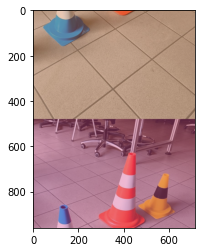

In [ ]:
img= Image.open ('/content/corrupted.png')
x,y= img.size
i=np.array(img)
plt.imshow(i)

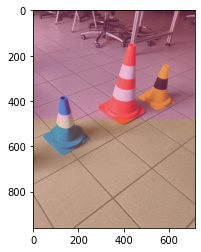

In [ ]:
m= np.zeros((y,x,3), dtype=np.uint8)
m[:480,:]= i[480:,:]
m[480:,:]= i[:480,:]
plt.imshow(m)

In [ ]:
(np.round(((np.array([250, 158, 3]))/255)*150 +50)).astype("uint8"), (np.round(((np.array([40, 195, 240]))/255)*150 +50)).astype("uint8")

(array([197, 143,  52], dtype=uint8), array([ 74, 165, 191], dtype=uint8))

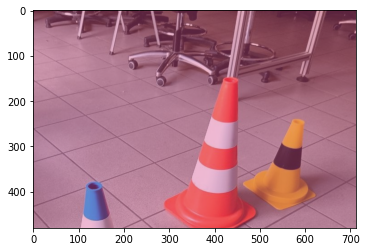

In [ ]:
mb= np.zeros((int(y/2),x,3), dtype=np.uint8)
mb[:,:]= m[:int(y/2),:]
plt.imshow(mb)

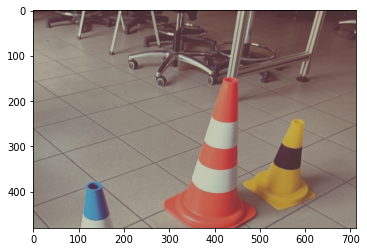

In [ ]:
correct_pixel=[191, 165, 74]
# Estimate the scaling factors for each color channel
scaling_factors = correct_pixel / mb[267, 564]

# Apply the scaling factors to the affected image to correct the chromatic aberration
corrected_image1 = np.clip(mb * scaling_factors, 50, 200).astype(np.uint8)
plt.imshow(corrected_image1)

In [ ]:
corrected_image1[479,125] , ma[0,125]

(array([196, 200, 181], dtype=uint8), array([232, 199, 179], dtype=uint8))

30 235
30 235


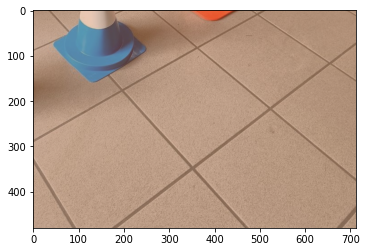

In [ ]:
ma= np.zeros((int(y/2),x,3), dtype=np.uint8)
ma[:,:]= m[int(y/2):,:]
print(ma.min(), ma.max())
#ma = (np.round(((ma-30)/205)*150 +50)).astype(np.uint8)
print(ma.min(), ma.max())
plt.imshow(ma)

In [ ]:
ma[541-int(y/2), 128], y, int(y/2), correct_pixel / ma[541-int(y/2), 128]

(array([ 87, 143, 177], dtype=uint8),
 960,
 480,
 array([2.1954023 , 1.15384615, 0.4180791 ]))

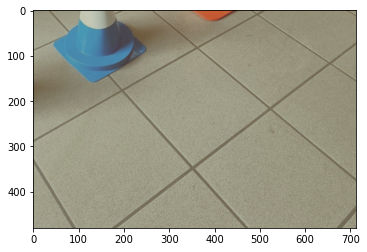

In [ ]:
correct_pixel=corrected_image1[475, 10]
# Estimate the scaling factors for each color channel
scaling_factors = correct_pixel / ma[5, 10]

# Apply the scaling factors to the affected image to correct the chromatic aberration
corrected_image2 = np.clip(ma * scaling_factors, 50, 200).astype(np.uint8)
#print(corrected_image2[541-int(y/2), 128])
plt.imshow(corrected_image2)

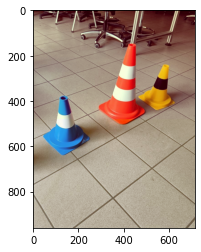

In [ ]:
mr= np.zeros((y,x,3), dtype=np.uint8)
mr[:480,:]= corrected_image1
mr[480:,:]= corrected_image2
mr = (np.round(((mr-50)/150)*255)).astype(np.uint8)

plt.imshow(mr)
plt.imsave('recovered.png', mr)